<a href="https://colab.research.google.com/github/diegoeduardo/MachineLearning/blob/master/ML_Classificacao_05_N%C3%A3oSupervisionado_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd

In [87]:
uri_filmes = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'
#uri_filmes = 'c:/Users/silvade/Downloads/movies.csv'
filmes = pd.read_csv(uri_filmes)
filmes.columns = ['filme_id','titulo','generos']
filmes.head()


,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [88]:
#dumies
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes,generos],axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
#escalar dados - verificar qual carac mais relevante
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape




(9742, 20)

In [0]:
#Algoritomo K - Means
from sklearn.cluster import KMeans



In [91]:
#qual numero de clusters
modelo  = KMeans(n_clusters= 3)
modelo.fit(generos_escalados)
#print("Grupos {} ".format(modelo.labels_))
print(f'Grupos {modelo.labels_}')

Grupos [0 0 2 ... 2 0 2]


In [92]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995 -0.10115377  0.89499079  2.23487412  2.59098654  0.25081583
  -0.32821014 -0.20175279 -0.59135944  0.88995462 -0.09492563 -0.27243349
   0.19068706  0.41024562 -0.1296102  -0.27192903  0.0566893  -0.47199108
  -0.16834631 -0.08171191]
 [-0.05917995  1.79775905  0.55991606 -0.16104568 -0.2662766  -0.35765518
   0.30428602 -0.20482396 -0.29513231  0.07949707 -0.06137648  0.01603132
   0.32553467 -0.17396408 -0.03311638 -0.30192748  0.72536537  0.55749478
   0.15030228  0.05435626]
 [ 0.02409768 -0.48023701 -0.27242553 -0.25212575 -0.27045122  0.06495068
  -0.04003334  0.08299573  0.15945609 -0.13983855  0.02944077  0.03172301
  -0.11467458 -0.00663004  0.02628     0.11896504 -0.20669657 -0.09049686
 

In [93]:
# 02 Visualizando os centróides
#transf em df e pos grafico
grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
 
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.101154,0.894991,2.234874,2.590987,0.250816,-0.328210,-0.201753,-0.591359,0.889955,-0.094926,-0.272433,0.190687,0.410246,-0.129610,-0.271929,0.056689,-0.471991,-0.168346,-0.081712
1,-0.059180,1.797759,0.559916,-0.161046,-0.266277,-0.357655,0.304286,-0.204824,-0.295132,0.079497,-0.061376,0.016031,0.325535,-0.173964,-0.033116,-0.301927,0.725365,0.557495,0.150302,0.054356
2,0.024098,-0.480237,-0.272426,-0.252126,-0.270451,0.064951,-0.040033,0.082996,0.159456,-0.139839,0.029441,0.031723,-0.114675,-0.006630,0.026280,0.118965,-0.206697,-0.090497,-0.018949,-0.004091


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dc968c898>,
      dtype=object)

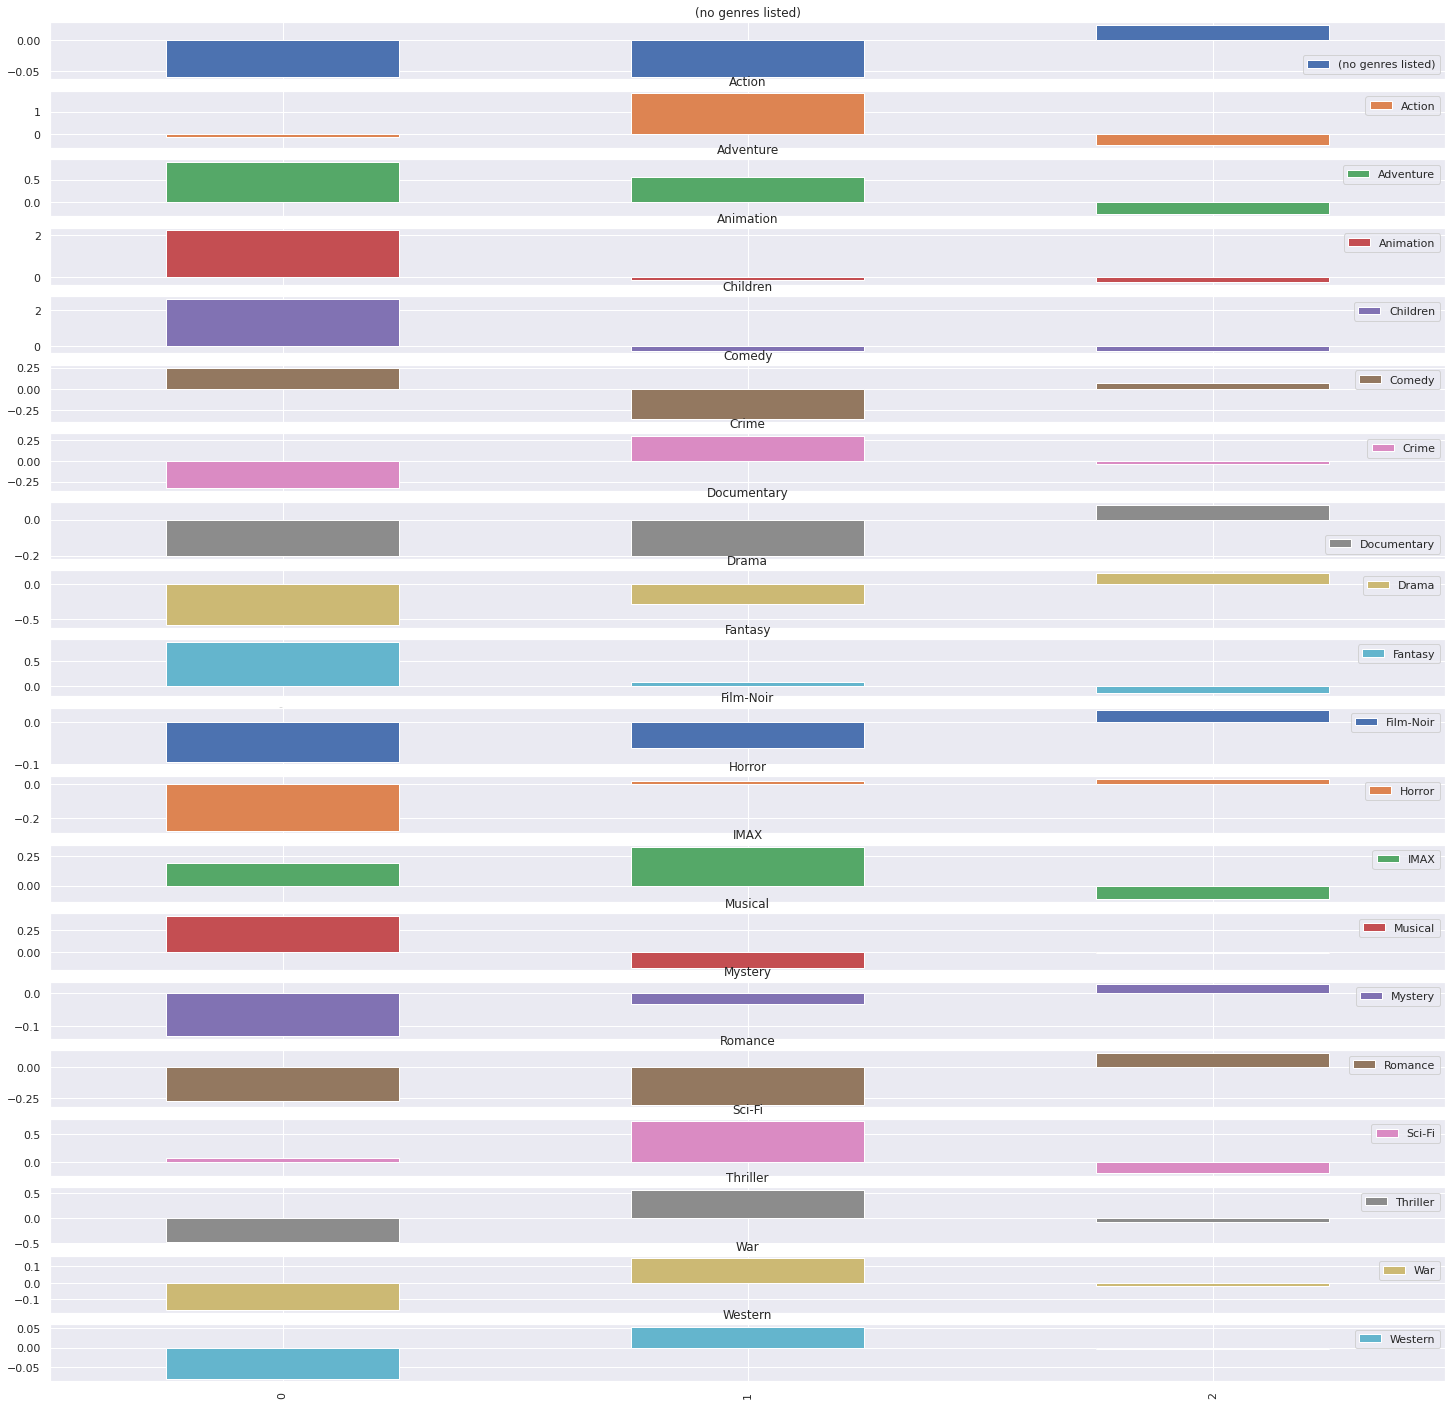

In [94]:
#plotar o grafico de barra 
grupos.plot.bar(subplots = True, 
                figsize=(25,25),
                sharex=False)



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dc8fdcf60>,
      dtype=object)

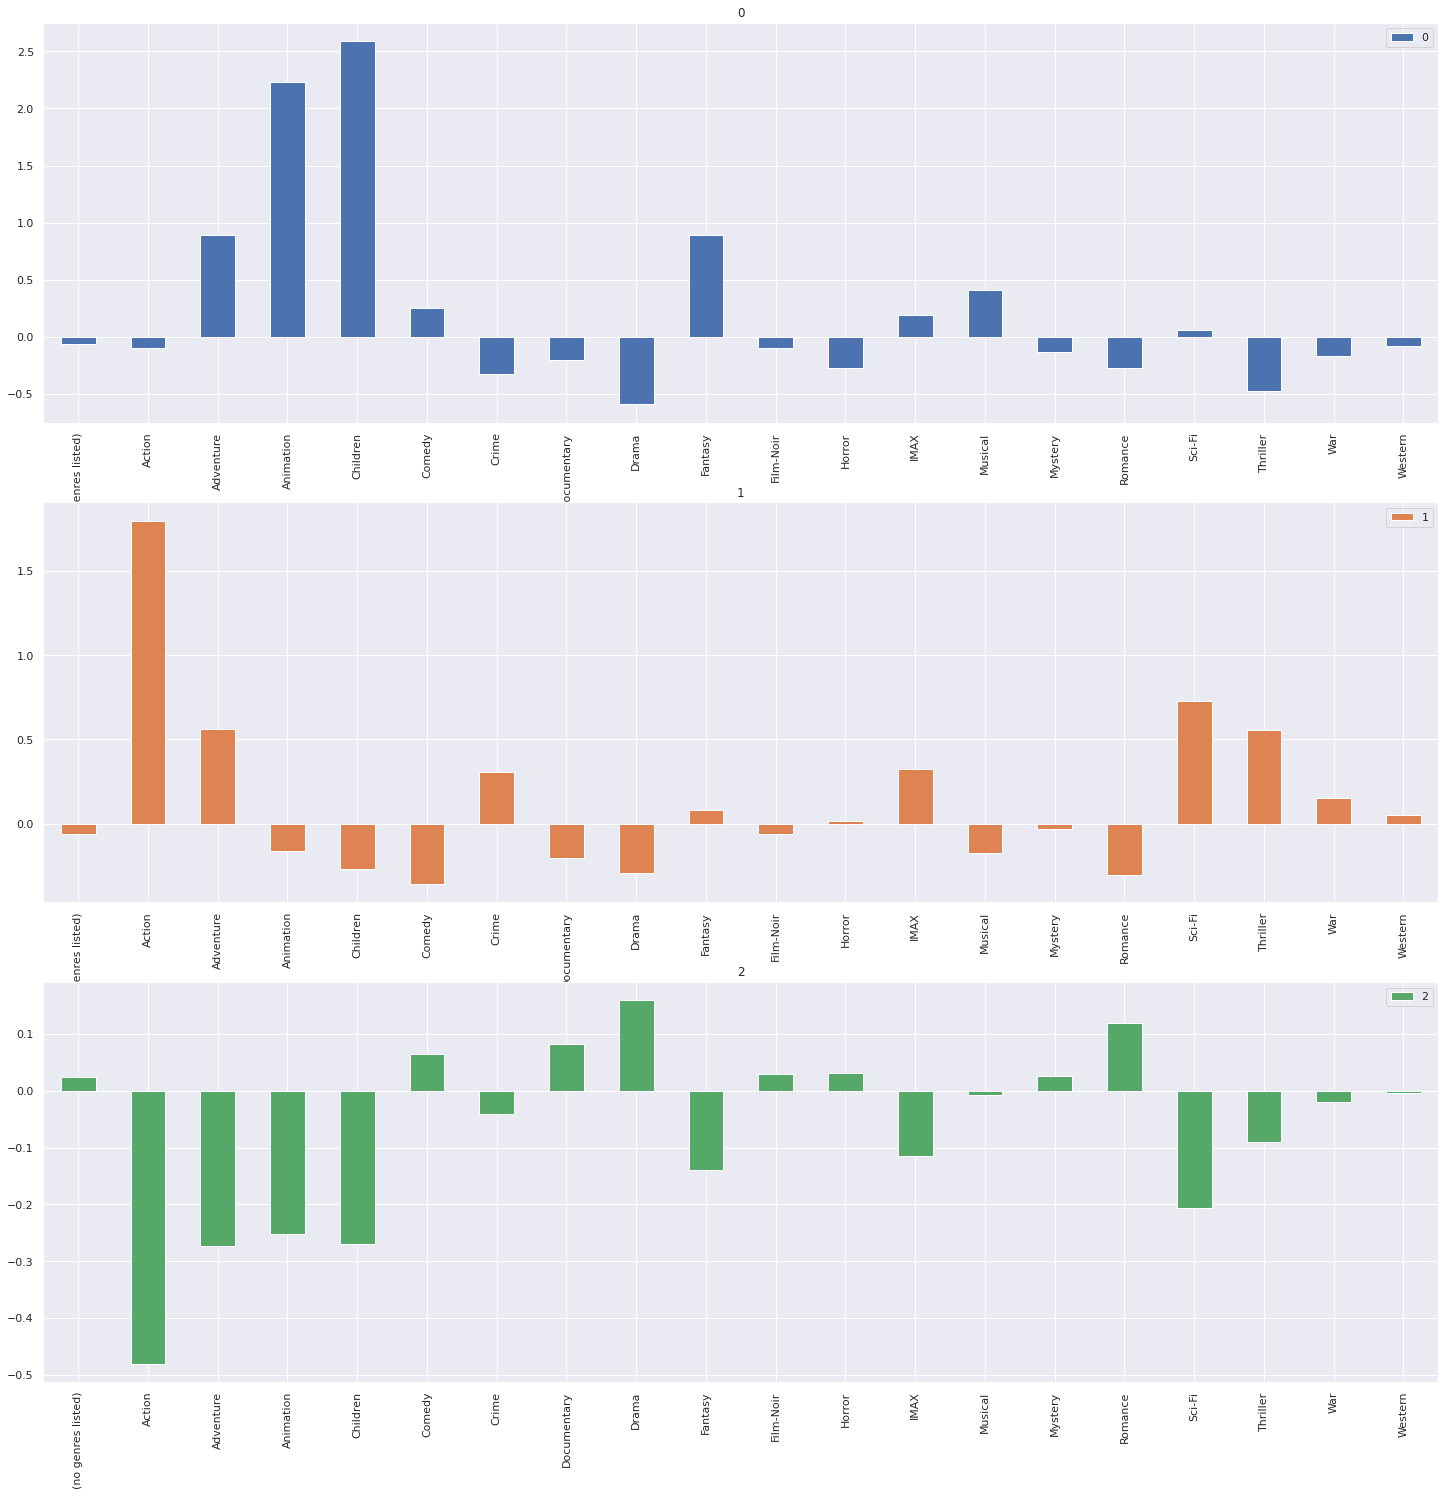

In [95]:
#plotar o grafico de barra 
grupos.transpose().plot.bar(subplots = True, 
                figsize=(25,25),
                sharex=False)


In [12]:
grupo = 2

#filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

NameError: ignored

##Usando make_blobs

In [0]:
from sklearn.datasets import make_blobs


In [0]:
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)


In [98]:
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


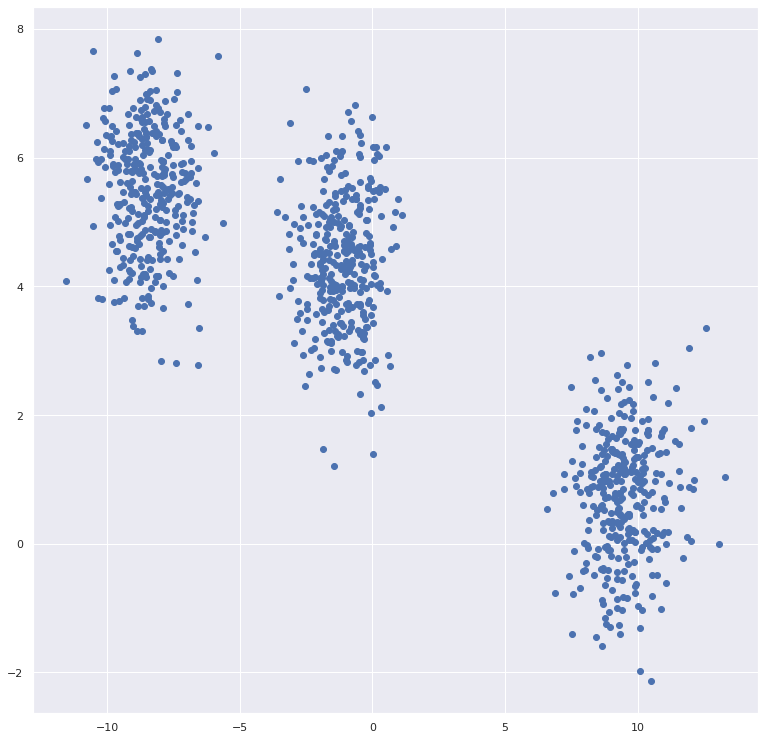

In [104]:
import matplotlib.pyplot as plt

plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [0]:
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)

In [0]:
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')

In [0]:
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')

In [0]:
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

##Usando o TSNE


In [14]:
print(generos.columns)
print(modelo.cluster_centers_)


Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.03654163 -0.26755436 -0.24656532 -0.24155948 -0.18744194  0.25339911
  -0.16085465  0.1318939   0.17690055 -0.1809547  -0.08963118 -0.27494011
  -0.11130965  0.02327155 -0.1836541   0.19346281 -0.24225468 -0.48286831
   0.08539231  0.04189352]
 [-0.05917995  0.51146386  1.51911989  1.63983477  1.43192806 -0.01610896
  -0.30384273 -0.20976624 -0.65188889  1.16572924 -0.09492563 -0.26734365
   0.60804351  0.24789086 -0.14773606 -0.29096647  0.58001769 -0.42236343
  -0.17309893 -0.08264064]
 [-0.05917995  0.39388532 -0.16556618 -0.23865745 -0.26563572 -0.60927789
   0.54519396 -0.21554145 -0.10217095 -0.14715785  0.26627058  0.80474991
  -0.03552274 -0.18174936  0.52199657 -0.32459195  0.29766096  1.38956434
 

In [0]:
from sklearn.manifold import TSNE


In [0]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

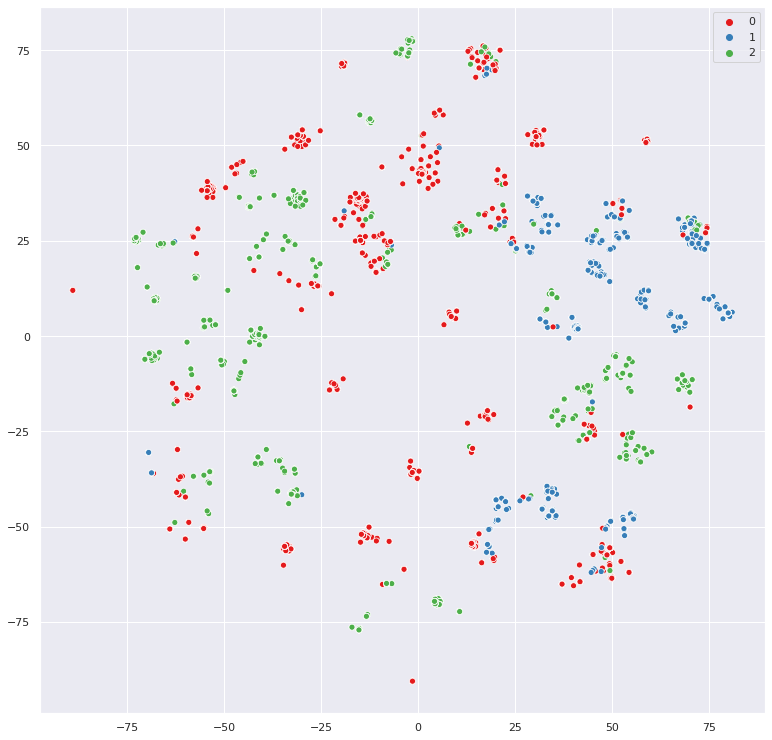

In [20]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,13)})

sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))



#OBS: comentado o trecho que altera o    modelo.labels_ mais acima.  >> #filtro = modelo.labels_ == grupo            


                

# Agrupando em 20 grupos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dccb0d550>,
      dtype=object)

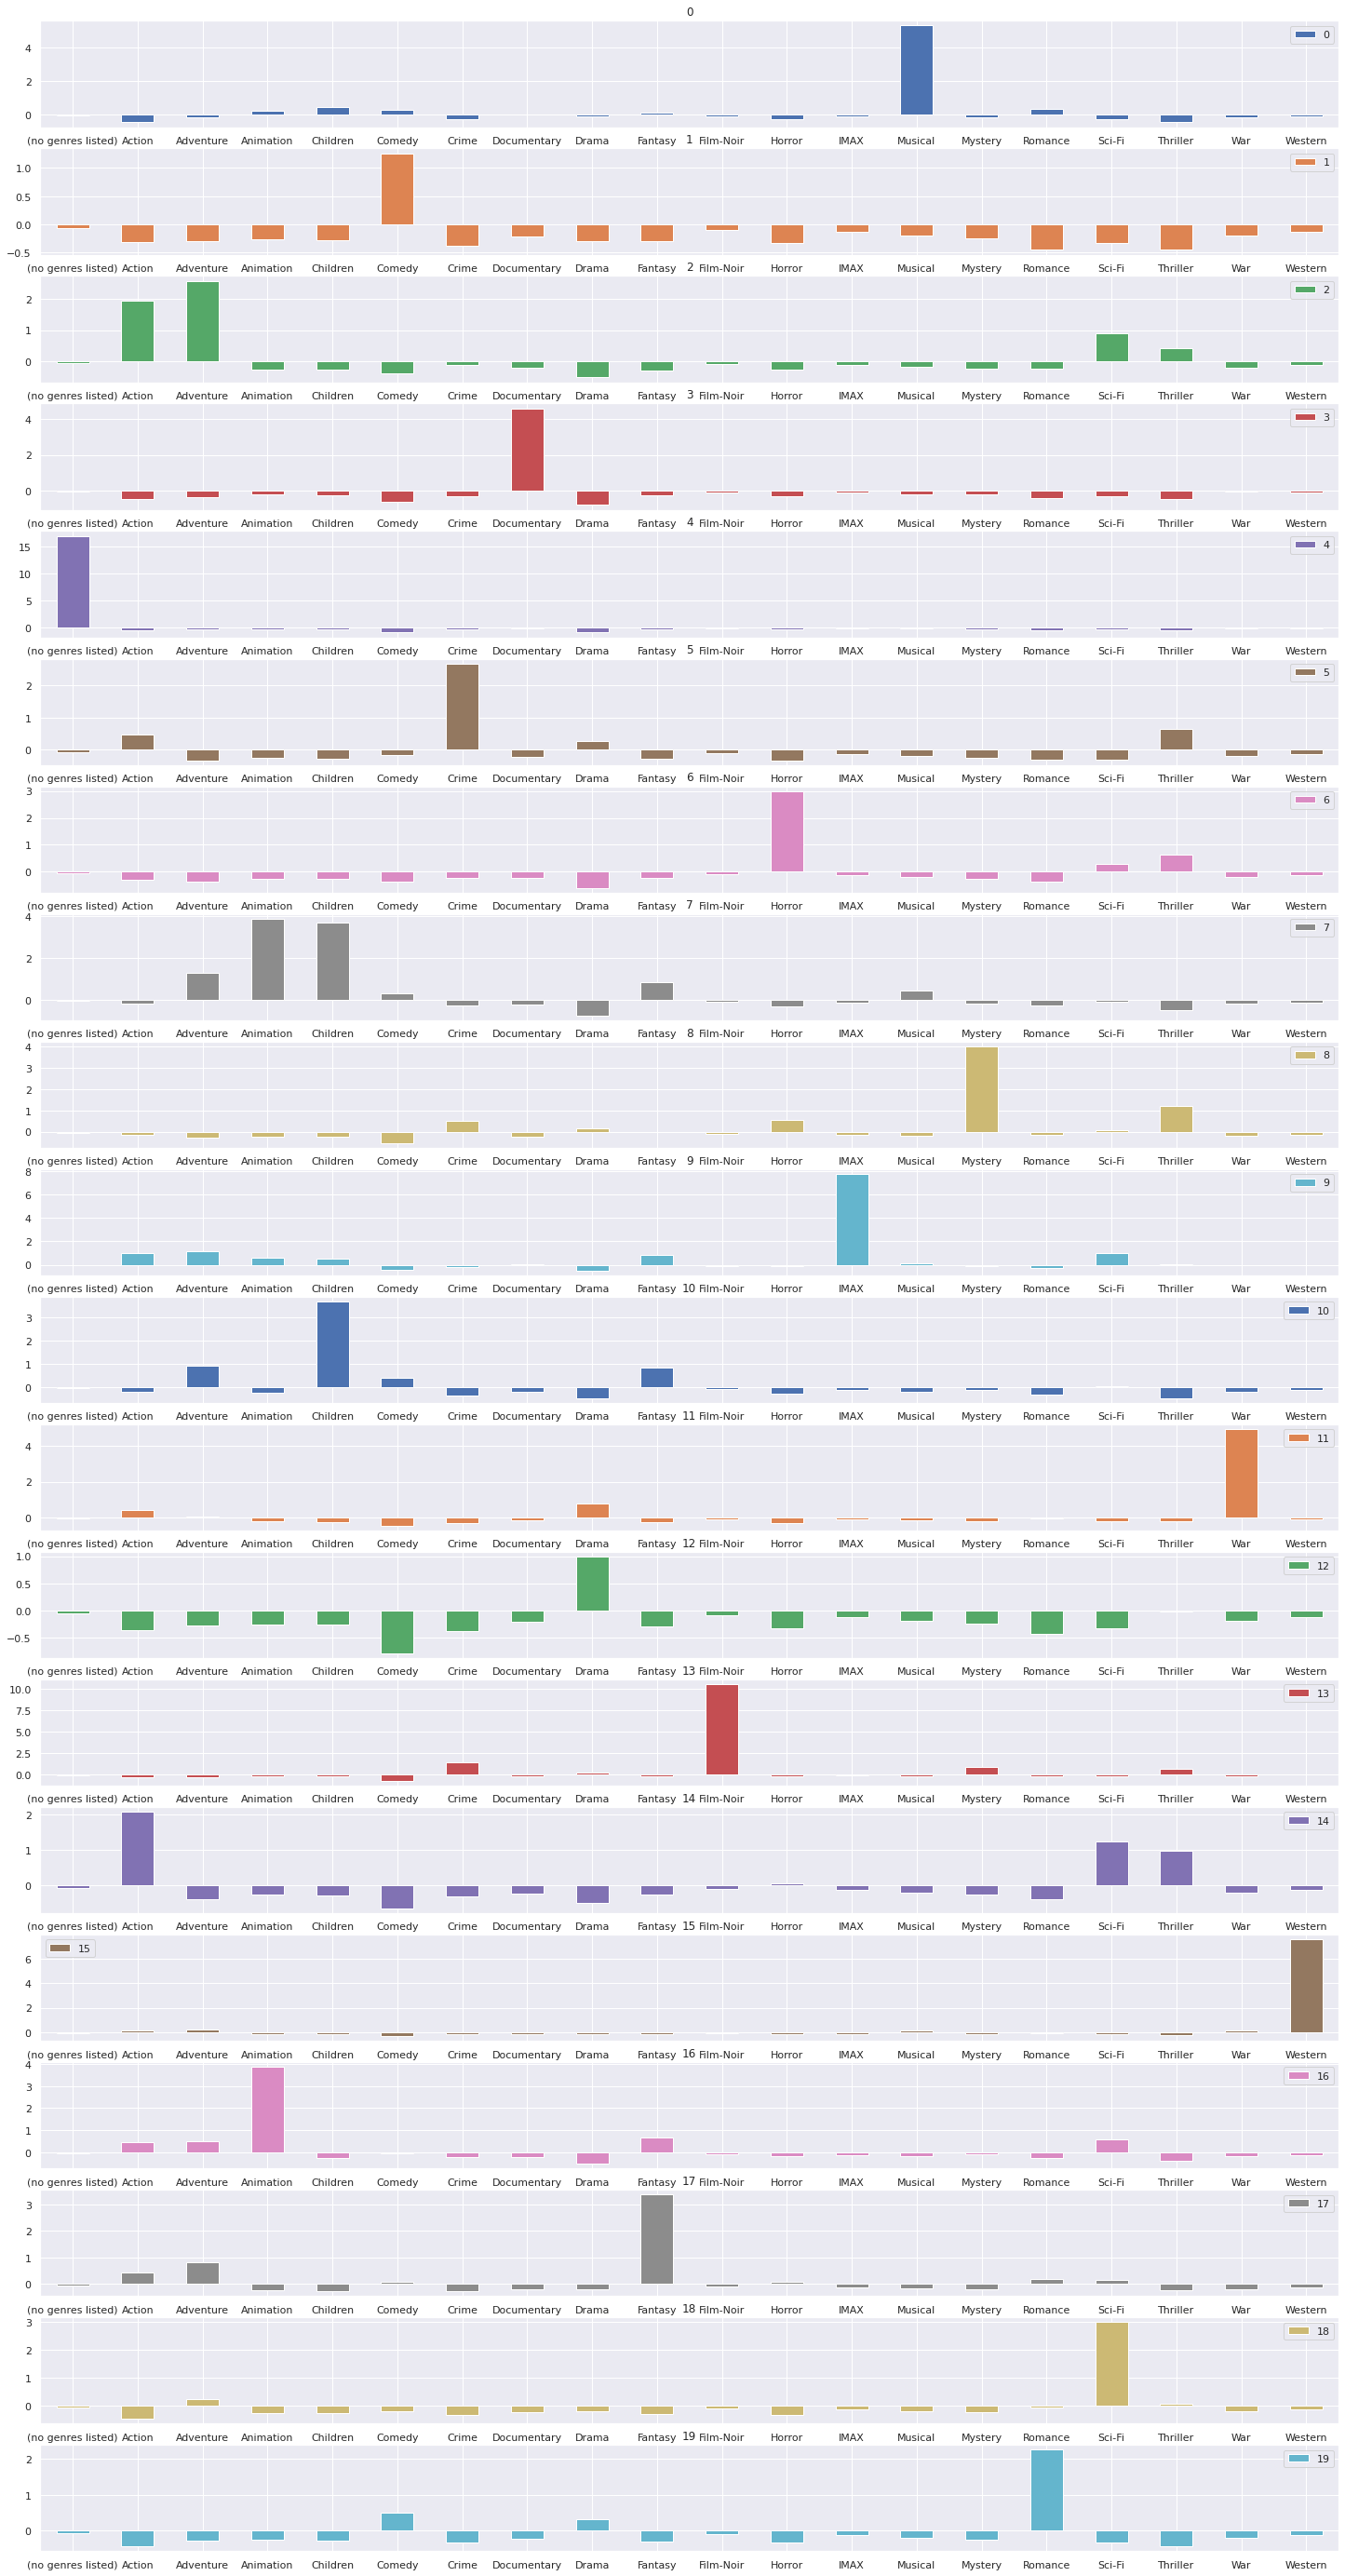

In [35]:
# Agrupando em 20 grupos
modelokmeans = KMeans(n_clusters=20)

modelokmeans.fit(generos_escalados)

grupos = pd.DataFrame(modelokmeans.cluster_centers_,
             columns=generos.columns)

grupos.transpose().plot.bar(subplots = True, 
                figsize=(25,50),
                sharex=False,
                rot=0)




In [36]:
grupo = 2

filtro = modelokmeans.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2710,3635,"Spy Who Loved Me, The (1977)",Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2164,2880,Armour of God (Long xiong hu di) (1987),Action|Adventure|Comedy,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1145,1499,Anaconda (1997),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9313,159690,Teenage Mutant Ninja Turtles: Out of the Shado...,Action|Adventure|Comedy,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8286,105954,All Is Lost (2013),Action|Adventure|Drama,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4502,6664,Commando (1985),Action|Adventure,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8964,136912,God Loves Caviar (2012),Adventure,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3909,5493,In Like Flint (1967),Action|Adventure|Comedy,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2529,3389,Let's Get Harry (1986),Action|Adventure,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1331,1801,"Man in the Iron Mask, The (1998)",Action|Adventure|Drama,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


##Quantos grupos escolher

In [0]:
def kmeans(numero_de_clusters, generos):
  modelo=KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters,modelo.inertia_]

In [43]:
kmeans(20, generos_escalados)

[20, 55506.1892155315]

##Metodo Cotovelo

In [47]:
#percorre o kmeans por 40 vezes e mostra o erro inertia
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1,41)]
resultado


[[1, 194840.0],
 [2, 179559.13600234484],
 [3, 168062.3187642976],
 [4, 157556.92367742007],
 [5, 148437.10953700182],
 [6, 137262.08114040853],
 [7, 127772.06880884206],
 [8, 120061.12766046368],
 [9, 110624.68397505608],
 [10, 100181.78658528066],
 [11, 93907.25752310854],
 [12, 89346.73248689766],
 [13, 81905.09629042905],
 [14, 76721.61998883686],
 [15, 69217.54376827968],
 [16, 65513.546592948675],
 [17, 62596.915027736584],
 [18, 58633.68865852582],
 [19, 56627.68766455722],
 [20, 55051.82873154689],
 [21, 53337.235941049716],
 [22, 52040.035292744746],
 [23, 51219.77154407081],
 [24, 49222.96220774313],
 [25, 48757.880114781474],
 [26, 46810.671697036014],
 [27, 46110.003370970844],
 [28, 44410.54811861445],
 [29, 43755.87311807149],
 [30, 43096.674322992214],
 [31, 41521.94873611908],
 [32, 41360.33633285365],
 [33, 40603.990352389505],
 [34, 39868.20427227903],
 [35, 38475.33332624489],
 [36, 38428.62116485409],
 [37, 37289.72143699869],
 [38, 36144.68760284675],
 [39, 36247.6

In [50]:
#mostrando em grafico
resultado = pd.DataFrame(resultado,
             columns=['grupos','inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179559.136002
2,3,168062.318764
3,4,157556.923677
4,5,148437.109537
5,6,137262.081140
6,7,127772.068809
7,8,120061.127660
8,9,110624.683975
9,10,100181.786585


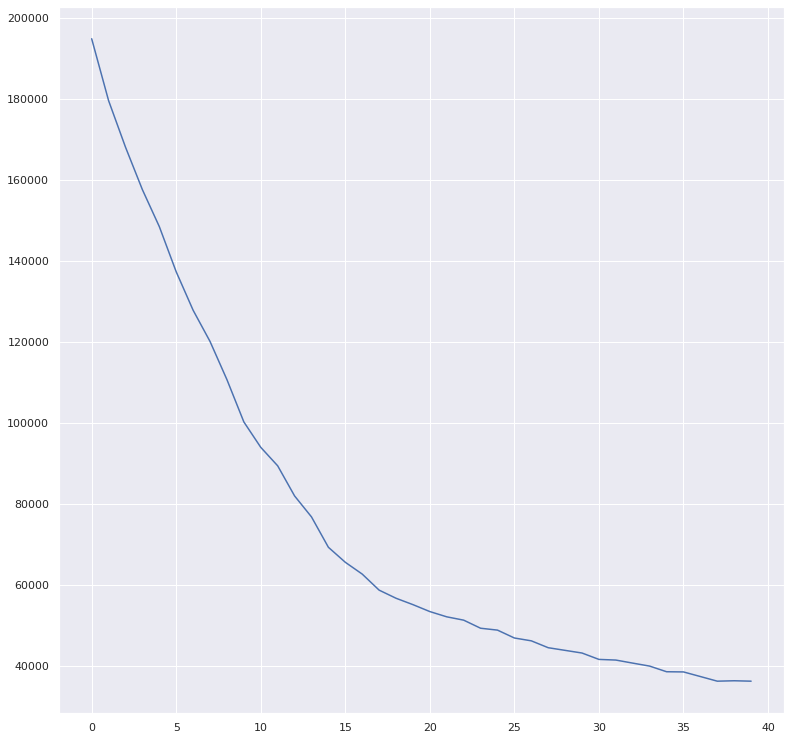

In [52]:
resultado.inertia.plot()

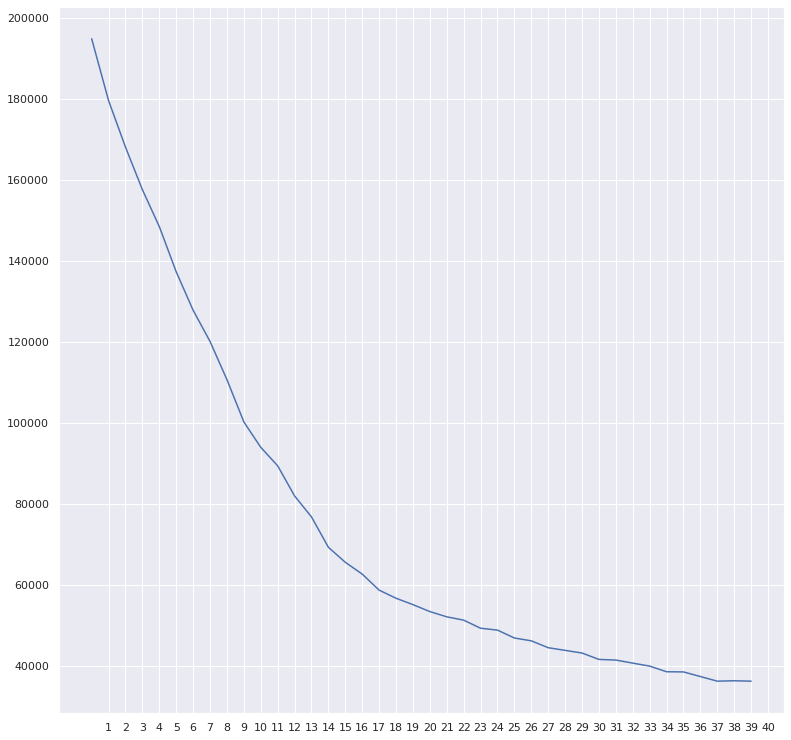

In [57]:
resultado.inertia.plot(xticks = resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dcb6a0908>,
      dtype=object)

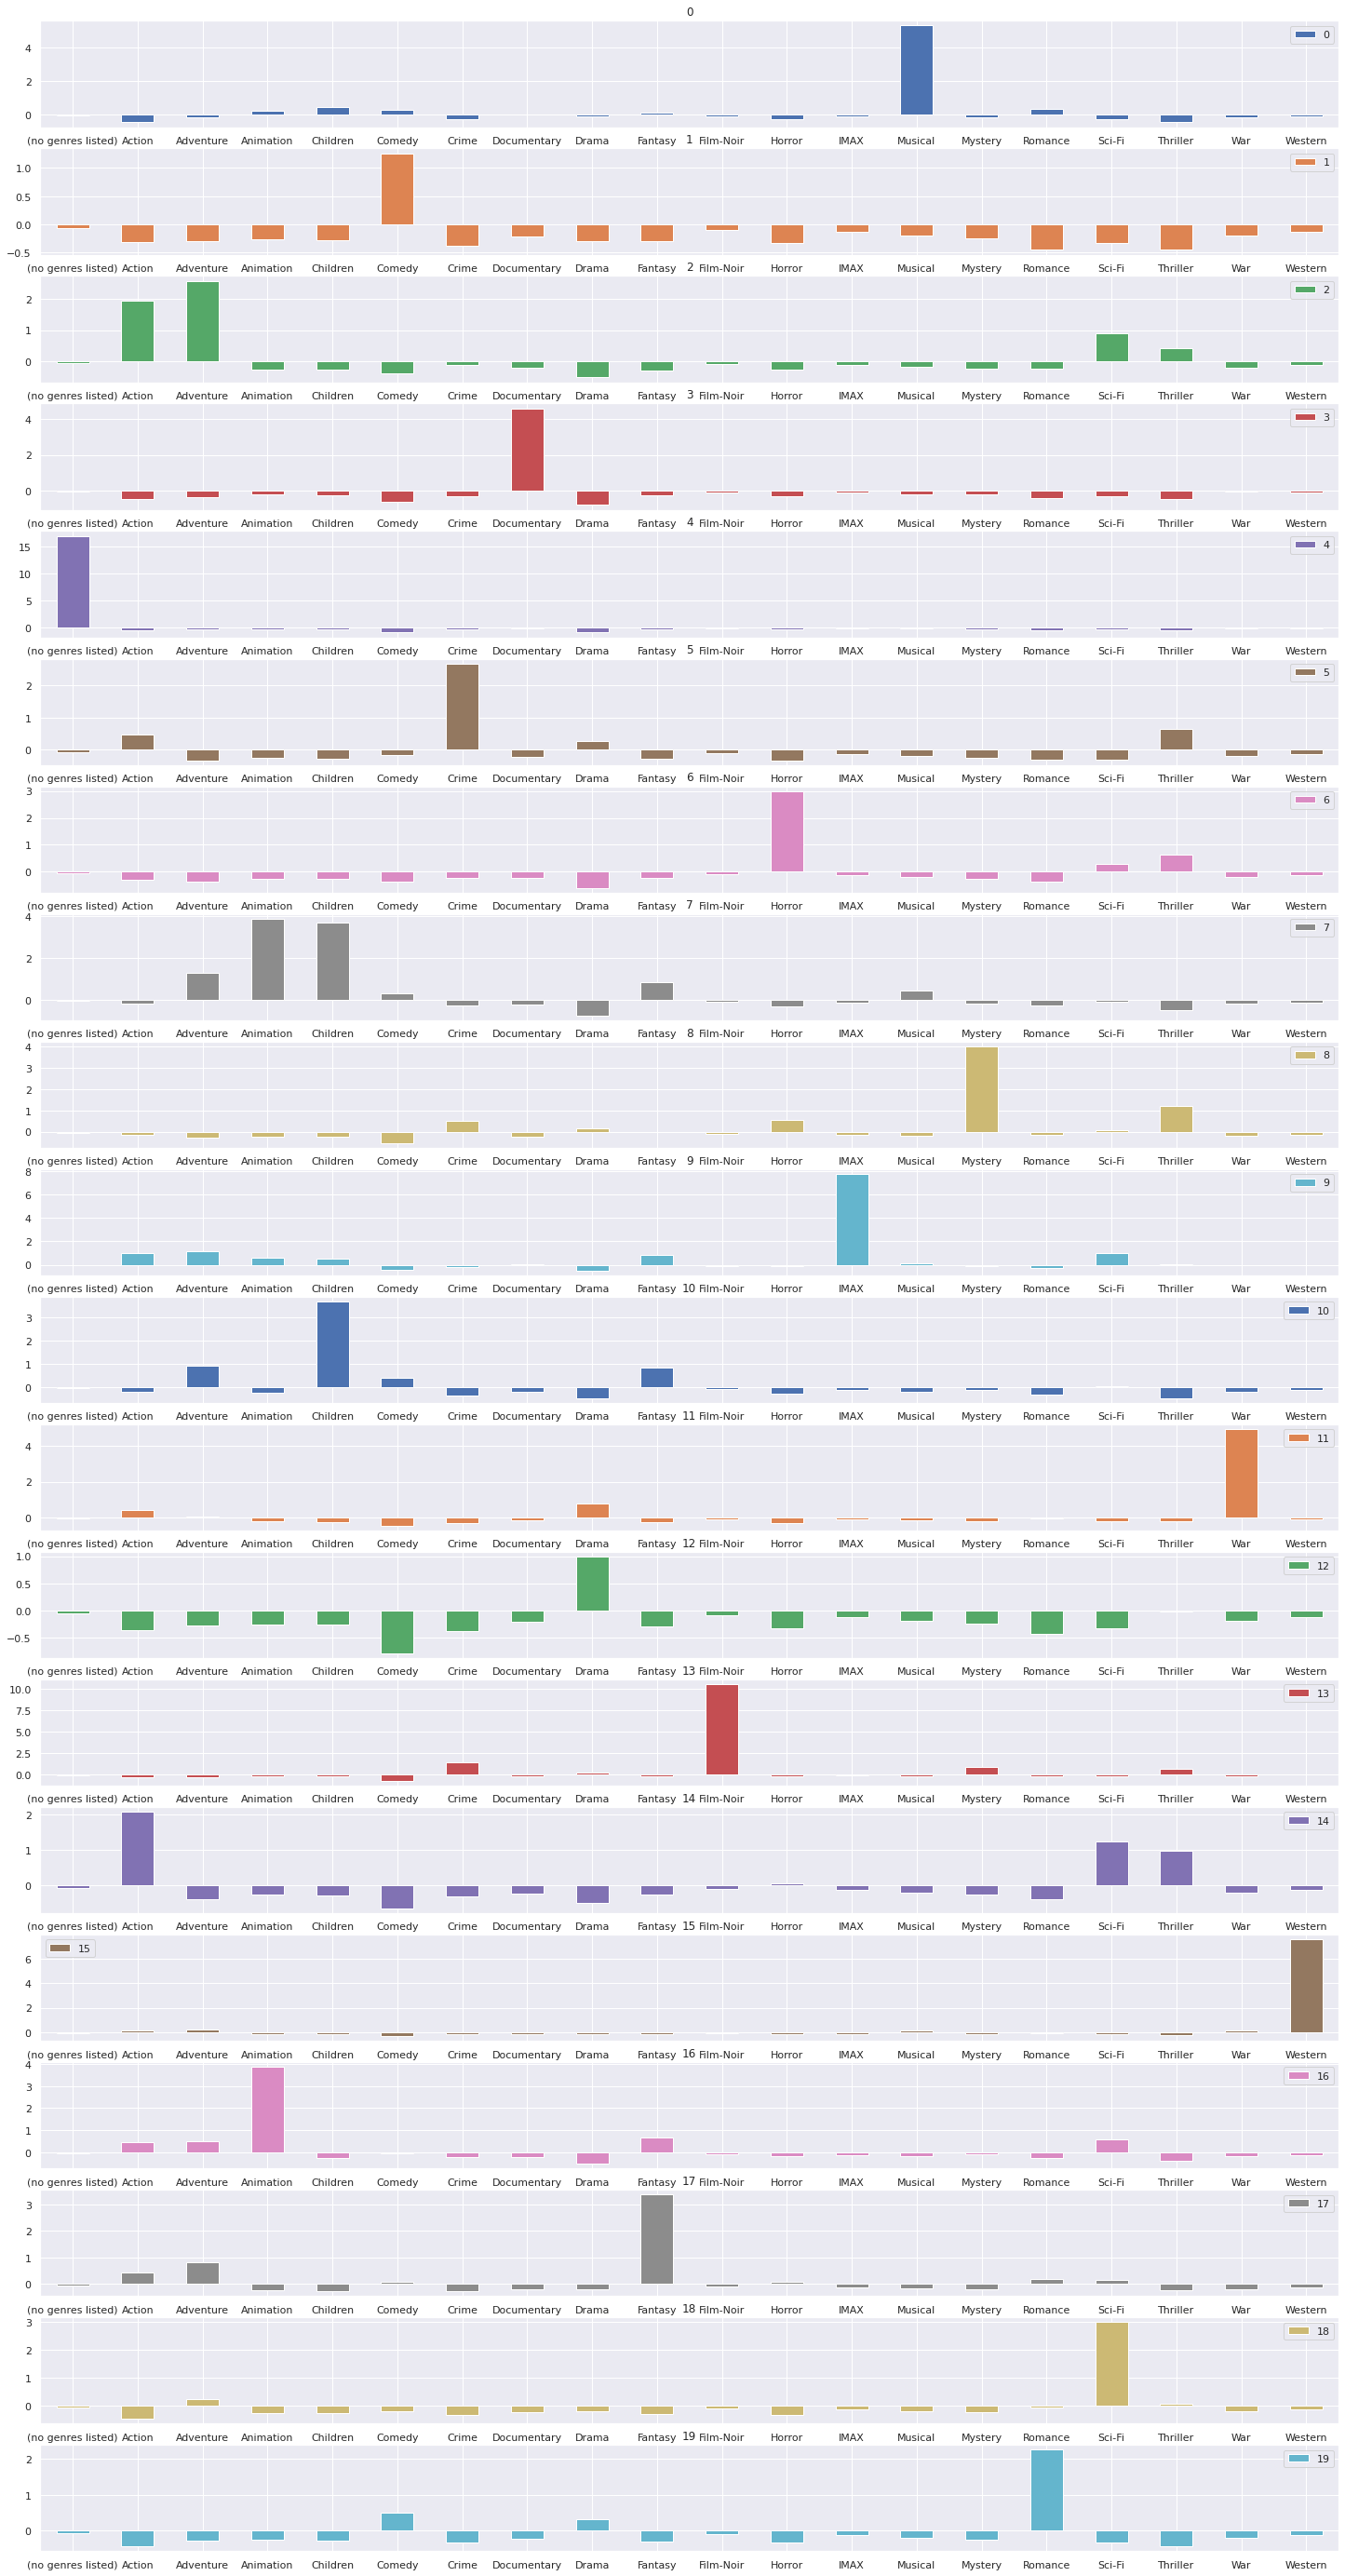

In [56]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelokmeans.cluster_centers_,
             columns=generos.columns)

grupos.transpose().plot.bar(subplots = True, 
                figsize=(25,50),
                sharex=False,
                rot=0)


In [59]:
grupo = 7

filtro = modelokmeans.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4348,6350,Laputa: Castle in the Sky (Tenkû no shiro Rapy...,Action|Adventure|Animation|Children|Fantasy|Sc...,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2841,3799,Pokémon the Movie 2000 (2000),Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6112,42734,Hoodwinked! (2005),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8231,104076,"Smurfs 2, The (2013)",Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2250,2987,Who Framed Roger Rabbit? (1988),Adventure|Animation|Children|Comedy|Crime|Fant...,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
272,313,"Swan Princess, The (1994)",Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6486,53121,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9255,156025,Ice Age: The Great Egg-Scapade (2016),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Conhecendo o agrupamento hierárquico

In [0]:
#esse tipo de analise é usado para analise de textos - palavras
#usando 
from sklearn.cluster import AgglomerativeClustering



In [61]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos


array([ 5, 14, 13, ...,  2,  5,  3])

In [62]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 44.977688 , -32.645535 ],
       [ 18.526094 ,  62.185795 ],
       [  1.2682387,  39.20248  ],
       ...,
       [ -0.8847082,  12.136386 ],
       [-19.342146 , -44.021976 ],
       [  5.328265 , -22.042673 ]], dtype=float32)

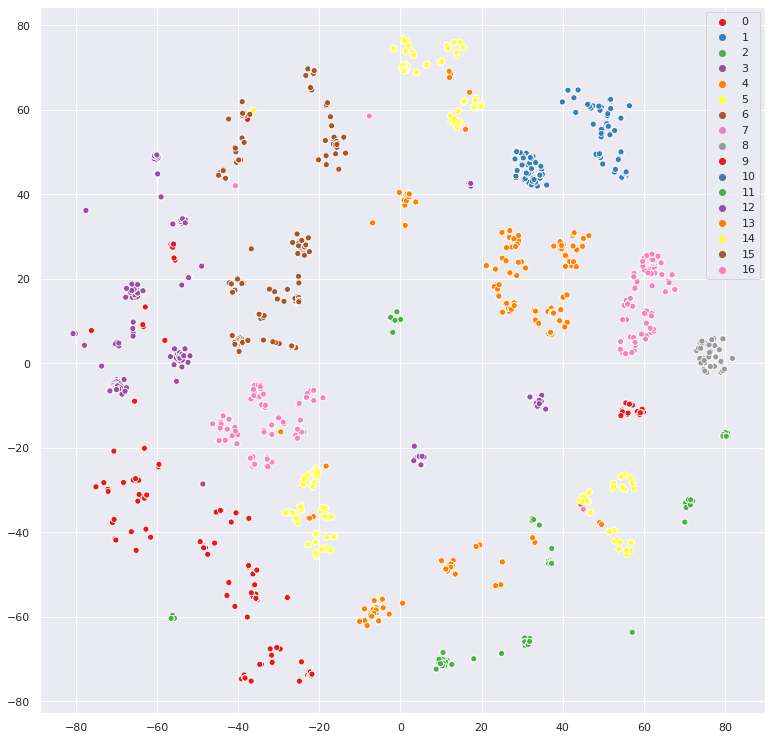

In [64]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 17))

##Plotando um dendrograma  - Scipy

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dca764550>,
      dtype=object)

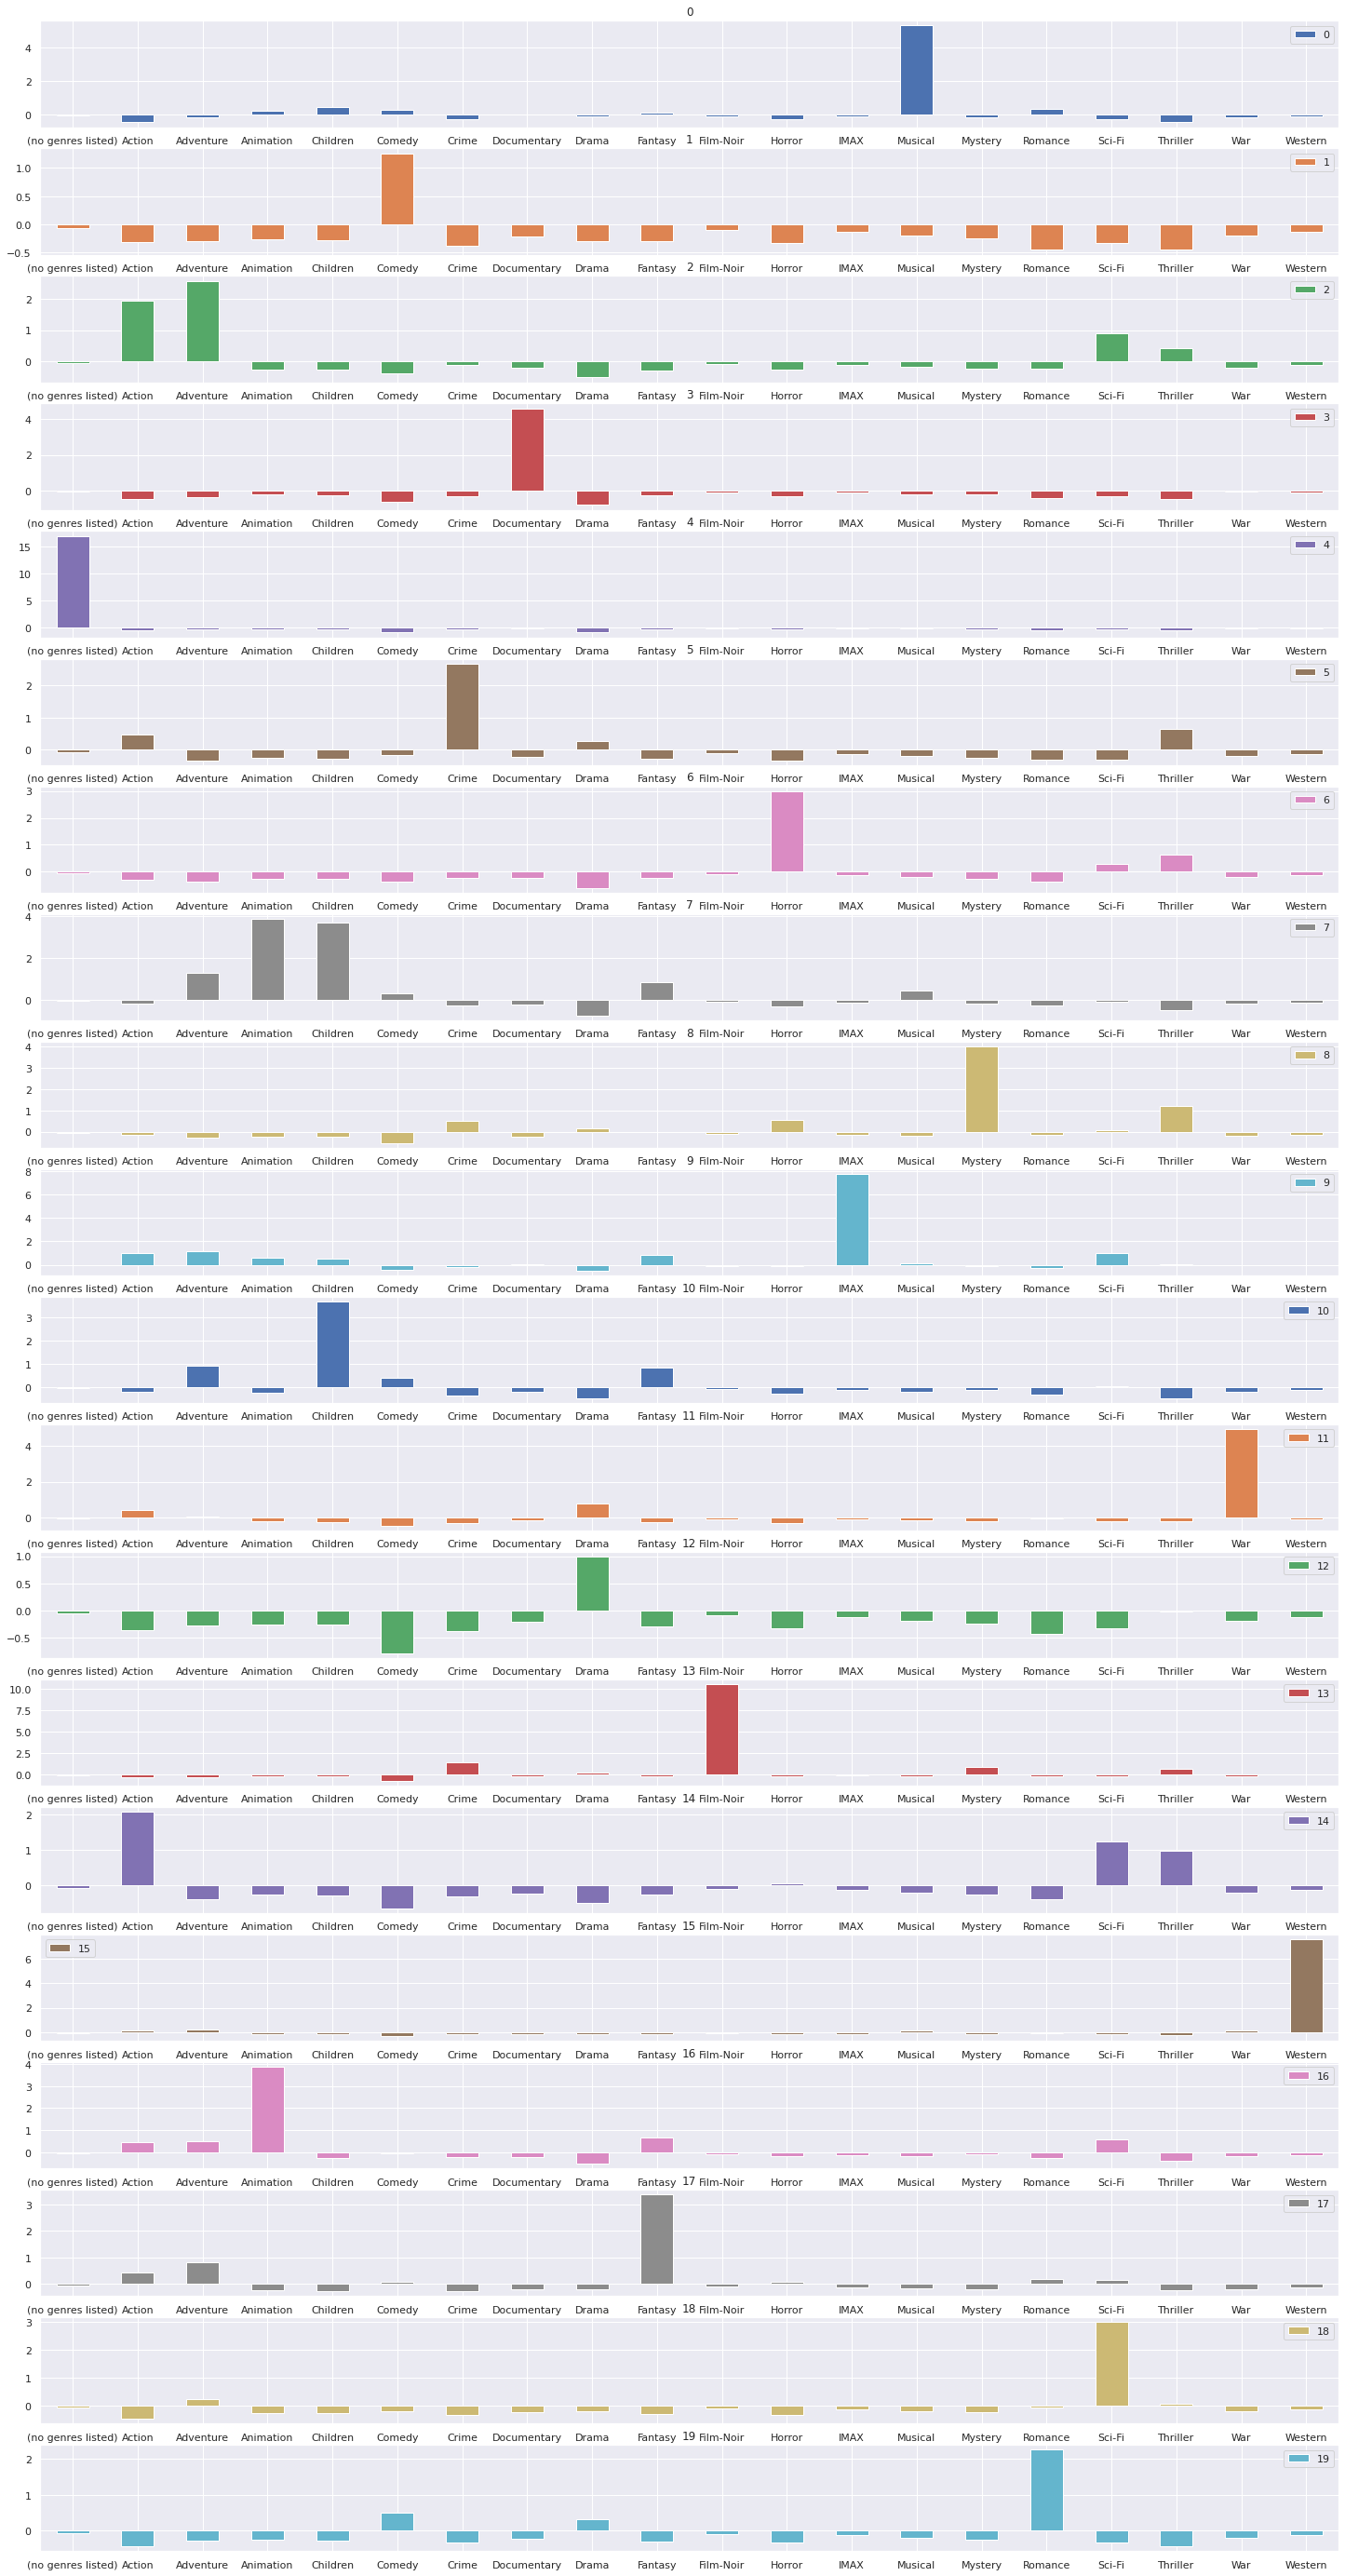

In [66]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelokmeans.cluster_centers_,
             columns=generos.columns)

grupos.transpose().plot.bar(subplots = True, 
                figsize=(25,50),
                sharex=False,
                rot=0)

In [72]:
matriz_distancia = linkage(grupos)
matriz_distancia

array([[ 1.        , 12.        ,  2.46311164,  2.        ],
       [19.        , 20.        ,  2.87723778,  3.        ],
       [ 2.        , 14.        ,  3.08958228,  2.        ],
       [18.        , 22.        ,  3.36376392,  3.        ],
       [ 5.        , 21.        ,  3.37201604,  4.        ],
       [23.        , 24.        ,  3.45719652,  7.        ],
       [ 6.        , 25.        ,  3.8229353 ,  8.        ],
       [17.        , 26.        ,  4.19297656,  9.        ],
       [ 7.        , 10.        ,  4.19945902,  2.        ],
       [16.        , 28.        ,  4.2188354 ,  3.        ],
       [27.        , 29.        ,  4.41406237, 12.        ],
       [ 8.        , 30.        ,  4.70994244, 13.        ],
       [ 3.        , 31.        ,  5.16765149, 14.        ],
       [11.        , 32.        ,  5.25435418, 15.        ],
       [ 0.        , 33.        ,  5.7270917 , 16.        ],
       [15.        , 34.        ,  7.87441591, 17.        ],
       [ 9.        , 35.

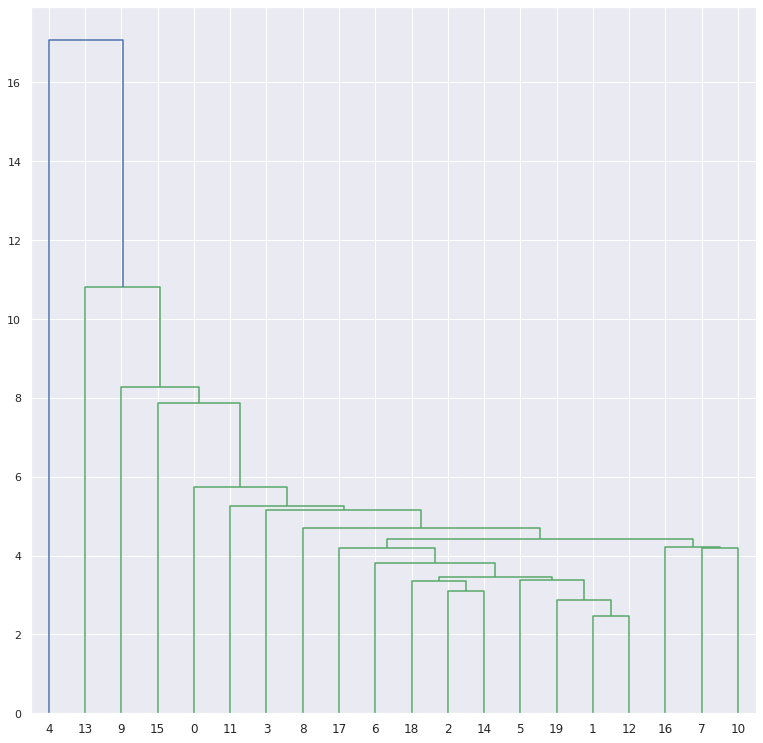

In [76]:
#plotar o dendrogram 
dendrogram = dendrogram(matriz_distancia)

AGRUPAMENTO POR DBSCAN

In [0]:
from sklearn.cluster import DBSCAN


In [100]:
modelo = DBSCAN()
grupos = modelo.fit_predict(dados)

grupos

array([ 0,  1,  0,  2, -1,  0,  1,  0,  1,  2,  2,  2,  0,  2,  1,  0,  2,
        0,  2,  1,  2,  0,  1,  1,  2,  1,  0,  2,  1,  1,  0,  0,  0,  0,
        2,  2, -1,  1,  1,  1,  1,  2,  0,  1,  2,  1,  0,  2,  0,  1,  1,
        0,  1,  1,  1,  0,  0,  2,  1,  0,  0,  2,  1,  2,  2,  0,  2,  0,
       -1,  0,  0,  1,  0,  1,  2,  2,  1,  1,  2,  0,  2,  1,  0,  1,  1,
        2,  2,  2,  1, -1,  2,  1,  0,  0,  1,  2,  2,  2,  2,  0,  1,  1,
        1, -1,  1,  0,  1,  1,  1,  0,  0,  2,  1,  0,  2,  2,  1,  1,  1,
        0,  1,  1,  0,  2, -1,  1,  1,  0,  2,  1,  2,  0,  2,  1,  2,  0,
        2,  2,  0,  2,  0,  1,  2,  0,  0,  1,  1,  0,  1,  1,  0,  2,  1,
        2,  2,  1,  2,  2,  0,  2,  2,  1,  2,  2,  2,  2,  2,  2,  1,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  1,  2,  2,  1,  2,  2,
        1,  2,  1,  0,  1,  2,  1,  0,  0,  2,  2,  1,  0,  2,  0,  0,  2,
        0,  1,  0,  2,  0,  2,  2,  2,  0,  1,  1, -1,  0,  2,  0,  0,  1,
        0,  1,  0,  1,  2

In [0]:
grupos = modelo.fit_predict(dados)


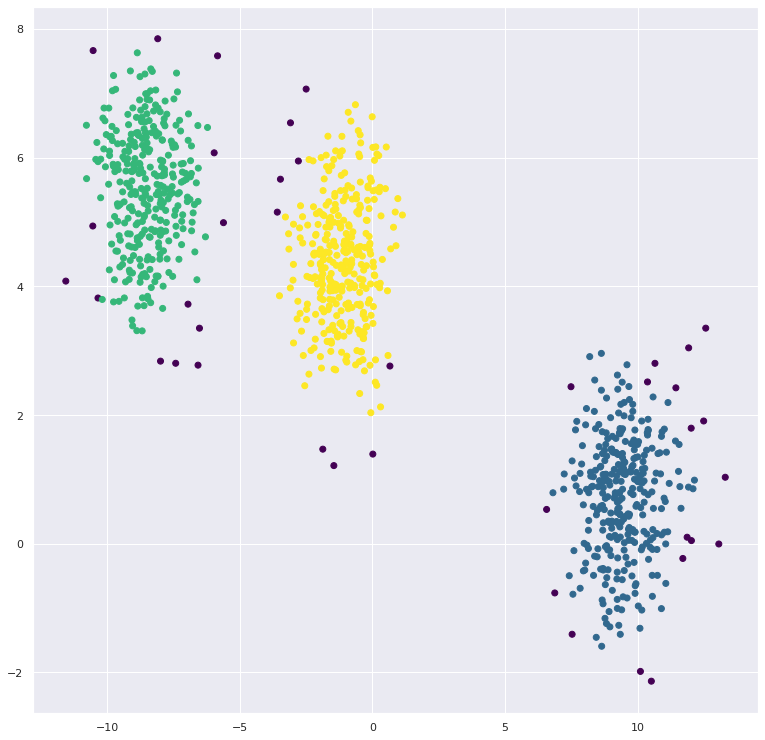

In [105]:
from sklearn.cluster import DBSCAN
modelo = DBSCAN()
grupos = modelo.fit_predict(dados)
plt.scatter(x=dados.coluna1,y=dados.coluna2,
            c=grupos,
            cmap='viridis')

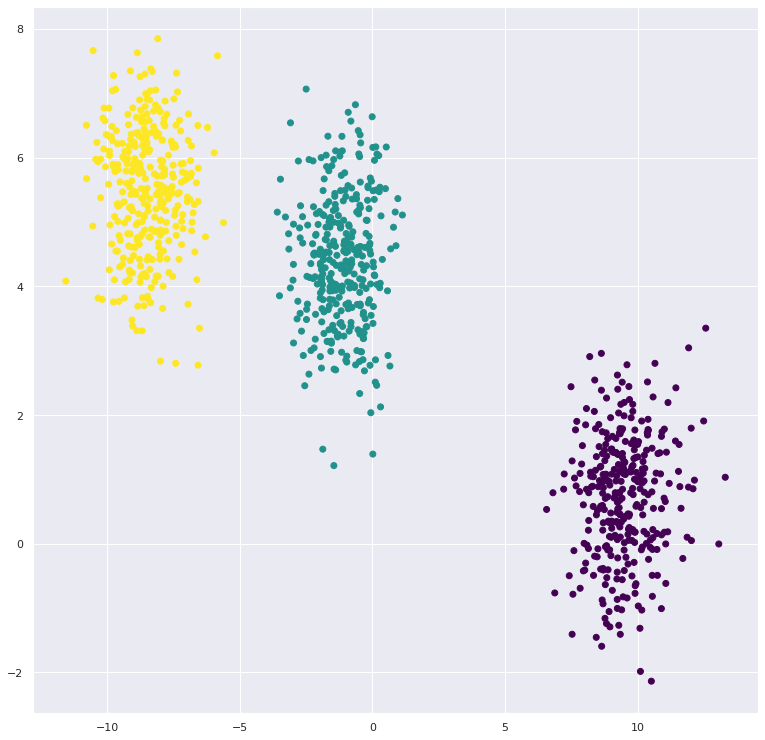

In [106]:
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)
plt.scatter(x=dados.coluna1,y=dados.coluna2,
            c=grupos,
            cmap='viridis')